# STAT 301 Final Project
**Eric Liu**,
**Ece Celik**, 
**Herman** ,
**Holly** 

## Introduction

Recently tech companies laid off more than 300,000 employees in the first half of 2023.

"The Tech Job Recession is Over," the Bernstein analysts declared in a recent email to clients. "Tech layoffs have slowed to a trickle. When will the hirings start to reaccelerate?"

(https://www.businessinsider.com/the-tech-job-recession-is-over-when-will-hiring-reaccelerate-2023-8)

- research shows ...... contribute the salary
  

The question that we will try to answer in this project is: **How do location of a company, company size, experience level of an employee, employment type, remote working ratio and work year predict the salary of an entry level data scientist?**

This question is focused on prediction. To answer this quesiton we will be using the following variables from our dataset:

* company_location (explanatory varibale)
* company_size (explanatory varibale)
* experience_level (explanatory varibale)
* employment_type (explanatory varibale)
* job_title (explanatory varibale)
* employee location (explanatory varibale)
* remote_ratio (explanatory varibale)
* work_year (explanatory varibale)
* salary (response variable)


This project will explore data on salaries of jobs in the Data Science domain. This dataset was obtained from Kaggle through the following link:

**Data Science Job Salaries:** https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Observations & Variables
In the description of the dataset, it is mentioned that the data was  aggregated by ai-jobs.net (https://ai-jobs.net/). The specific source of the data is shown as https://salaries.ai-jobs.net/ however this link does not work at the moment.

The Kaggle dataset that will be used in this project has 607 rows and 12 columns including and id column. The other 11 columns include four quantitative, five categorical and two ordinal variables. Their detailed descriptions are shown below:

* work_year: The year the salary was paid. The range of this data is from 2020-2022. This is a quantitative explanatory variable. </br>

* experience_level: Level of experience  in the job during the year. This variable is a ordinal explanatory varibale.The possible values are: </br>
  EN = Entry-level / Junior  </br>
  MI = Mid-level / Intermediate </br>
  SE = Senior-level / Expert </br>
  EX = Executive-level / Director </br>
  
* employment_type: Type of employement. This is a categorical explanatory varibale. The possible values are: </br>
  PT = Part-time  </br>
  FT = Full-time  </br>
  CT = Contract </br>
  FL = Freelance </br>

* job_title: Position title during the year. This is a categorical explanatory variable. There 50 different values possible for every different Data Science position. The values include (Data Scientist, Machine Learning Scientist, Big Data Engineer etc.) </br>

* salary: Total gross salary amount paid. This is the quantitative **response** variable that ranges from 4000 to 30400000 </br>

* salary_currency: Currency of the salary paid represented as ISO 4217 currency code. This is a categorical explanatory variable. It has 17 different values. The values include 'EUR','USD','GBP' etc. </br>

* salary_in_usd: Salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). This is a quantitative exploratory variable that ranges from 2859 to 600000.</br>

* employee_residence: Employee's primary country of residence in during the work year represented as ISO 3166 country code. This is a categorical explanatory varibale. It has 57 different values. The values include 'AU','BO','IE','CH' etc. </br>

* remote_ratio = Overall amount of work done remotely. This is quantitative explanatory variable. The possible values are: </br>
 0 = No remote work (less than 20%)</br>
 50 = Partially remote </br>
 100 =  Fully remote (more than 80%) </br>

* company_location = Country of the employer's main office or contracting branch as an ISO 3166 country code. This is categorical explanatory variable. It has 50 different values. The values include 'DE','JP','GB' etc. </br>

* company_size = Average number of people that worked for the company during the year. This  is a ordinal explanatory varibale. The possible values are: </br>
  S = less than 50 employees (small) </br>
  M = 50 to 250 employees (medium) </br>
  L = more than 250 employees (large) </br>

In addition, there does not seem to be any immediate missing values in the columns.
    
The dataset contains:
- **3** continuous numerical columns: `work_year`, `salary`, `salary_in_usd`
- **4** categorical variables: `job_title`, `salary_currency`, `employee_residence`, `company_location`
- **4** ordinal variables: `experience_level`, `employment_type`,`remote_ratio`, `company_size`
- There are zero NA/empty values in the dataset

# Exploratory Data Analysis

In [1]:
# Load required libraries
library(tidyverse)
library(ggplot2)
library(tidymodels)
library(broom)
library(mltools)
library(leaps)
library(data.table)
library("gridExtra")
library("cowplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in library(mltools): there is no package called ‘mltools’


In [2]:
# Load dataset from online
data <- read.csv("https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv", row.names = 1)
head(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [3]:
# Check for Missing values
apply(data, 2, function(x) any(is.na(x)))

work_year   experience_level    employment_type          job_title 
             FALSE              FALSE              FALSE              FALSE 
            salary    salary_currency      salary_in_usd employee_residence 
             FALSE              FALSE              FALSE              FALSE 
      remote_ratio   company_location       company_size 
             FALSE              FALSE              FALSE

In [4]:
# Column Names
colnames(data)

[1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "salary_in_usd"      "employee_residence" "remote_ratio"      
[10] "company_location"   "company_size"

In [5]:
glimpse(data)

Rows: 607
Columns: 11
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <chr> "MI", "SE", "SE", "MI", "SE", "EN", "SE", "MI", "MI…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Machine Learning Scientist", "Bi…
$ salary             <int> 70000, 260000, 85000, 20000, 150000, 72000, 190000,…
$ salary_currency    <chr> "EUR", "USD", "GBP", "USD", "USD", "USD", "USD", "H…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ company_size       <chr> "L", "S", "M", "S", "L", "L", "S", "L", "L", "S", "…


**Dropping un-used columns, changing characters to factors**

In [6]:
data <- data %>% 
    mutate_if(sapply(data, is.character), as.factor) %>% 
    select(-c(salary,salary_currency))
glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> MI, SE, SE, MI, SE, EN, SE, MI, MI, SE, EN, MI, EN,…
$ employment_type    <fct> FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT,…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Renaming values to understandable strings**

In [7]:
data <- data %>% 
    mutate(experience_level = recode(experience_level, EN = "Entry/Junior", 
                                                       MI = "Mid-level", 
                                                       SE = "Senior/Expert", 
                                                       EX = "Executive")) %>% 
    mutate(employment_type = recode(employment_type, PT = "Part-Time", 
                                                     FT = "Full-Time", 
                                                     CT = "Contract", 
                                                     FL = "Freelance")) %>%  
    mutate(remote_ratio = recode_factor(remote_ratio, '0'= "Stationary", 
                                                      '50' = "Partially remote", 
                                                      '100' = "Remote")) 

glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> Mid-level, Senior/Expert, Senior/Expert, Mid-level,…
$ employment_type    <fct> Full-Time, Full-Time, Full-Time, Full-Time, Full-Ti…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <fct> Stationary, Stationary, Partially remote, Stationar…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Summary Statistics**

### Data Source
Data was indicated to be sourced from https://salaries.ai-jobs.net/. However, site cannot be reached.

In [8]:
# Summary statistics
summary(data)

   work_year         experience_level  employment_type
 Min.   :2020   Entry/Junior : 88     Contract :  5   
 1st Qu.:2021   Executive    : 26     Freelance:  4   
 Median :2022   Mid-level    :213     Full-Time:588   
 Mean   :2021   Senior/Expert:280     Part-Time: 10   
 3rd Qu.:2022                                         
 Max.   :2022                                         
                                                      
                     job_title   salary_in_usd    employee_residence
 Data Scientist           :143   Min.   :  2859   US     :332       
 Data Engineer            :132   1st Qu.: 62726   GB     : 44       
 Data Analyst             : 97   Median :101570   IN     : 30       
 Machine Learning Engineer: 41   Mean   :112298   CA     : 29       
 Research Scientist       : 16   3rd Qu.:150000   DE     : 25       
 Data Science Manager     : 12   Max.   :600000   FR     : 18       
 (Other)                  :166                    (Other):129       
        

Subsetting the columns into 3 groups: **Categorical, Numeric, Ordinal**. For future use

In [9]:
# Group Columns
cat_colnames <- c('employment_type', 'job_title', 'employee_residence', 'company_location')
num_colnames <- c('work_year', 'salary_in_usd', 'remote_ratio')
ord_colnames <- c('experience_level', 'company_size')

## Visualizations

The question I posed in Assignment one was:
> What are the significant explanatory variables that contribute to `salary_in_usd`

Socially we know that usually a higher salary correlates to variables such as `experience_level`. By creating preliminary histograms, one for each unique value of the variable, we can get a informative view of the distribution of salaries. This helps us formulate hypotheses to whether or not they will have a positive or negative effect in our models

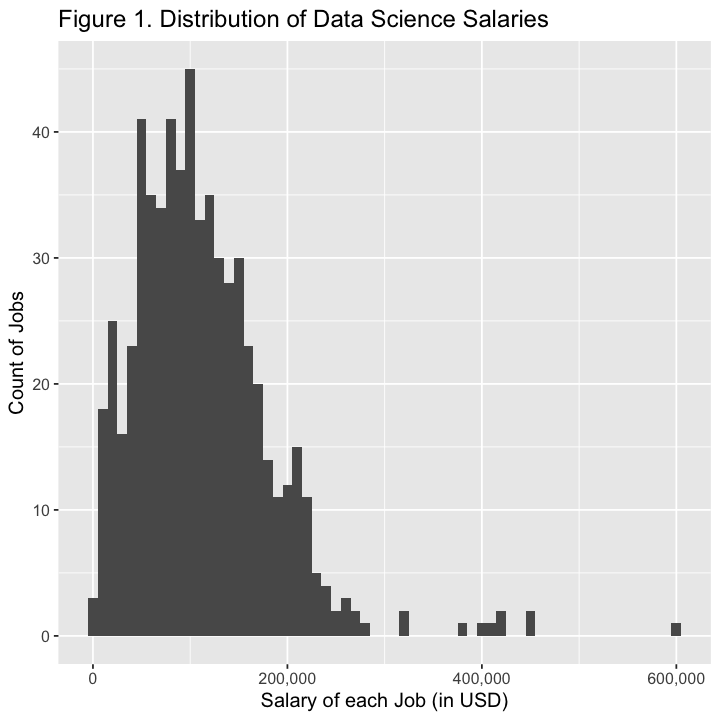

In [10]:
options(repr.plot.width=6, repr.plot.height=6)

p1 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 1. Distribution of Data Science Salaries") + 
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p1)

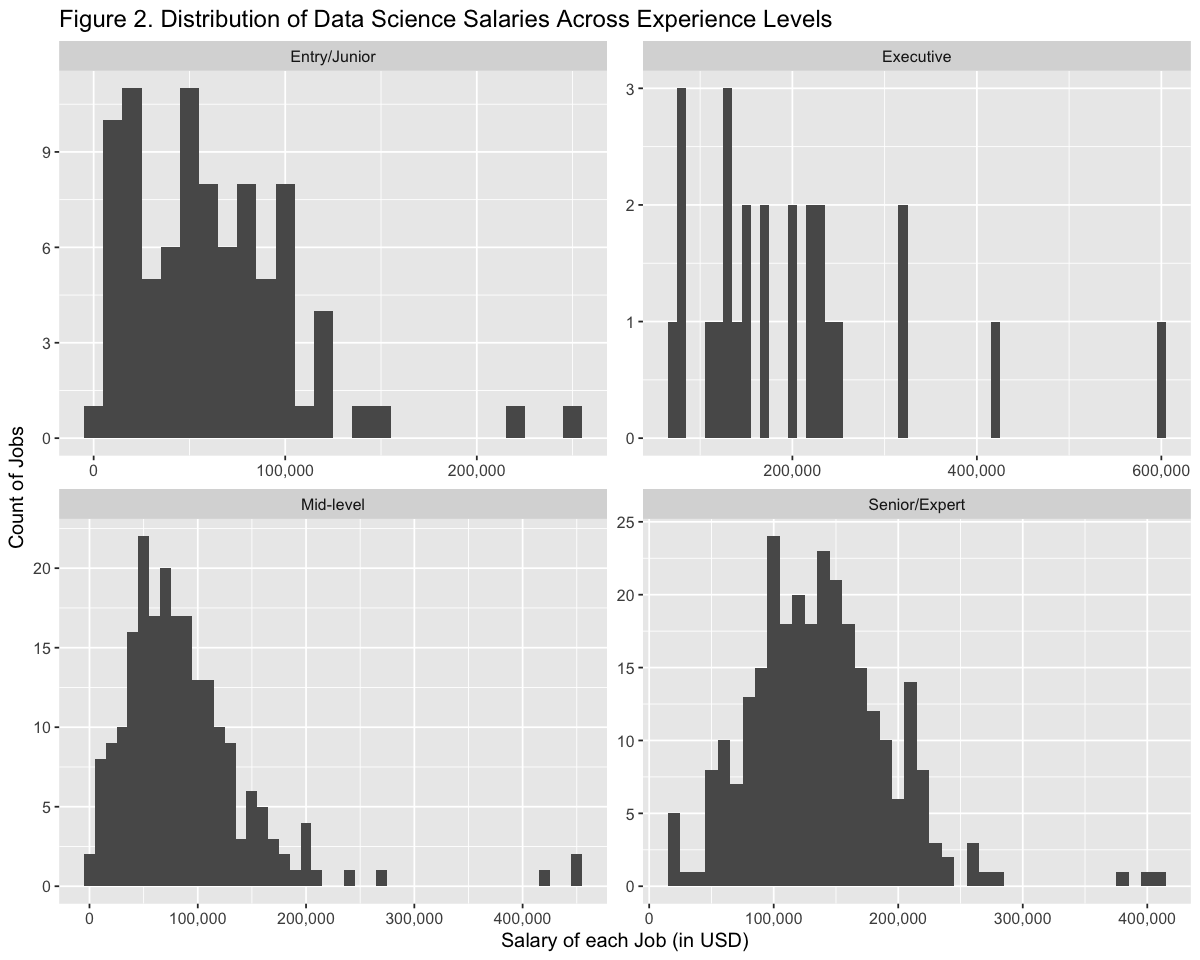

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

# Plotting each Distribution
p2 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 2. Distribution of Data Science Salaries Across Experience Levels") + 
    facet_wrap(~experience_level, scale="free") +
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p2)

Although this is very preliminary plotting, it gives us some insights about the trends and values in the `experience_level` explanatory variable such as:
- We see that general range of salaries for each of the 4 experience level groups
- We see that the median/mean salaries seem to increases positively with experience level
- We see the distribution values in the dataset to each experience levels (Which group is represented more/less)
- We can see that the *Executive* group contains fewer values than the rest, this asymmetry should considered during model creation.

This information allows us to create hypotheses so that we can verify and test if our model makes sense, and catch issues early such as the uneven counts in each group.

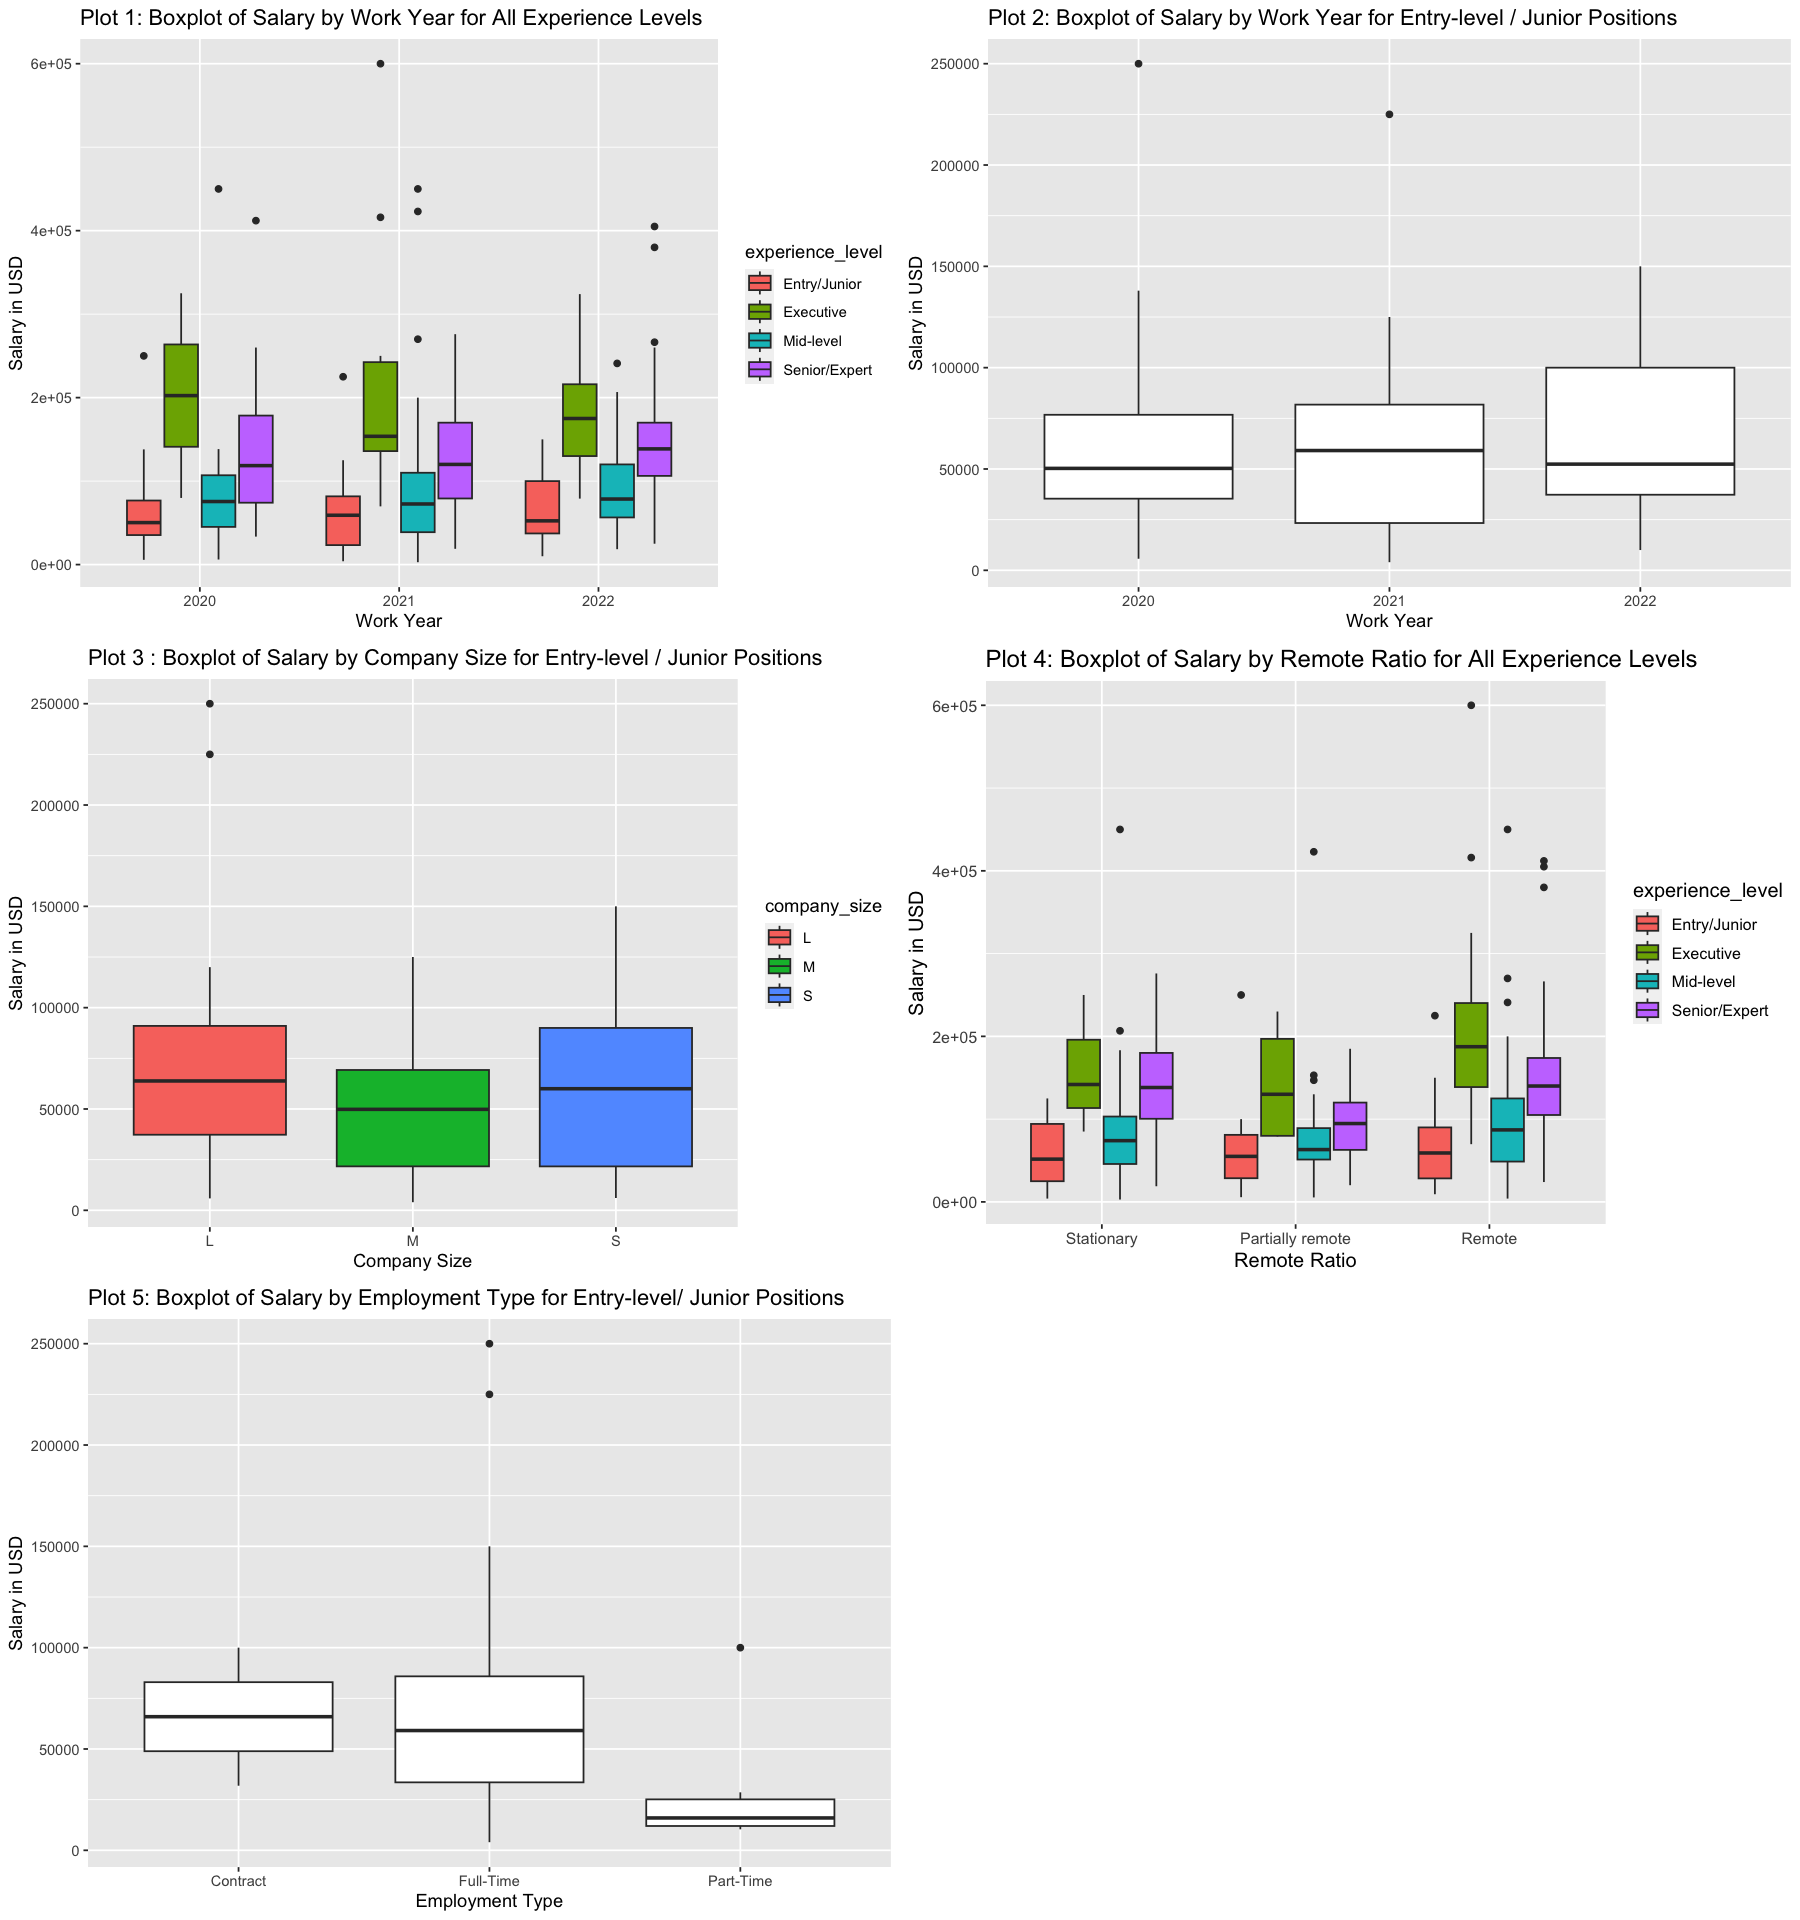

In [22]:
options(repr.plot.width = 15, repr.plot.height = 16)
library(gridExtra)

entry_data<- filter(data, experience_level == 'Entry/Junior')

plot_all1<- ggplot(data, aes(x = factor(work_year), y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Work Year", y = "Salary in USD") +
  ggtitle("Plot 1: Boxplot of Salary by Work Year for All Experience Levels ")
  
plot2<-ggplot(entry_data, aes(x = factor(work_year), y = salary_in_usd)) +
  geom_boxplot() +
  labs(x = "Work Year", y = "Salary in USD") +
  ggtitle("Plot 2: Boxplot of Salary by Work Year for Entry-level / Junior Positions ") 

plot3<-ggplot(entry_data, aes(x = company_size, y = salary_in_usd, fill = company_size)) +
  geom_boxplot() +
  labs(x = "Company Size", y = "Salary in USD") +
  ggtitle("Plot 3 : Boxplot of Salary by Company Size for Entry-level / Junior Positions") 


plot_all4<- ggplot(data, aes(x = remote_ratio, y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Remote Ratio", y = "Salary in USD") +
  ggtitle("Plot 4: Boxplot of Salary by Remote Ratio for All Experience Levels ") +
  theme(text = element_text(size=12))

plot5<-ggplot(entry_data, aes(x = employment_type, y = salary_in_usd)) +
  geom_boxplot() +
  labs(x = "Employment Type", y = "Salary in USD") +
  ggtitle("Plot 5: Boxplot of Salary by Employment Type for Entry-level/ Junior Positions") 

grid.arrange(plot_all1,plot2, plot3, plot_all4, plot5, ncol = 2)

All of these plots are relevent to address our question and explore the data because:

- Plot 1 and Plot 2 : One of the variables that we are trying to explore is work year and how the distribution of salary changes across different years. In Plot 1, we plot boxplots for last 3 years for all experience levels. This can give us an insight about whether a specific year had mostly higher or lower salaries for all levels. For example, in the case of a global economic crisis, it is likely that every experience level will receive a lower salary than other years. In Plot 2, we are specifically trying to explore how the salary for Entry-level / Junior Positions change in last 3 years. Exploring these two plots together is very important because if we only plotted Plot 2, we could be tempted to think that a certain year had a lower salary compared to others for Entry-level / Junior Positions while it is actually low for all experience levels and is not related to the experience level itself but related to some other external factor. In Plot 1 and Plot 2 we observe that in the last 3 years most experience levels received similar salaries and there has not been a significant increase or decrease.

- Plot 3: In plot 3, we are specifically trying to see which company size is giving the hughest salary for Entry-level / Junior Positions. From this plot, we can see that small and large companies have a very similar range for  Entry-level / Junior Positions. This plot is only plotted for Entry-level/ Junior position because we expected to have an increase in other expreience levels' salries as the company size got bigger.

- Plot 4: This plot communicates how salary in all experience levels changes for remote working options. Comparing it to all the experience levels, we see that Entry-level/ Junior position receives a a similar salary in every type of work environment (fully-remote, remote, half-remote). This is not the same for executive directors. There is a noticable difference in salary for fully remote and other work options.

- Plot 5: In this plot we observe that Entry-level/ Junior employees receive a similiar salary when their employement type is contract or full time. However, the amount they receive is significantly lower for part-time jobs. This plot is only plotted for  Entry-level/ Junior jobs because the concept of part-time is not existent for other experience levels.

In addition, a boxplot including company locations was not added because this dataset has 50 different country locations. I did not think that it would be appropriate to plot that variable using boxplots. Using a barplot could be more appropiate for this variable. Another groupmate I have (Eric) did data exploration though barplots. This variable can be found in his assignment.

# Methods and Plan Proposal

For this particular dataset, we believe that using **backward selection** for variable selection and then **multiple linear regression (MLR)** with an **interactive model** may be a suitable method to address the above question

> **Why is this method appropriate?**
- Since our goal question is inference, backwards selection allows us to test for relations between subsets of all variables that may contribute to predictions
- Similarly MLR allows us to test across multiple variables which may have an effect on the salary
- Likewise, as we expect that the change in salary per input may be dependent on other variables, we feel an interactive model will be most suitable.


> **Which assumptions are required, if any, to apply the method selected?**
- For backwards selection, we must have more observations than variables
- Since we are using a linear regression model, we must assume:
    1. Linear relation between the variables, tested using a plot of residuals-fitted values
    2. Errors are independent (Not a time series)
    3. Normal distribution of errors
    4. Heteroscedasticity (Equal variance of error terms)
- We are choosing the lowest multicollinearity variables using `vif`, or in otherwords, the input variables are not correlated


> **What are potential limitations or weaknesses of the method selected?**
- For backwards selection, there is the risk of removing a variable that may actually be relevant in the final model. This would hurt our final inference
- There is the risk that the relationship between our variables are not linear, or that a linear fit does not fit optimally.
- Similarly, alot of our data is categorical, meaning it may be difficult to produce an accurate linear model, and require encoding.

# Implementation of Proposed Model

In an effort to examine the proposed model above, we have decided to explore two different models:
1. MLR without variable selection
2. MLR with one-hot-encoding and backwards variable selection
Comparing the $R^2$ and adjusted $R^2$ values to see which model hints at a better approach for the final draft

Firslty, for both models, there are factors with low representation in our data which can be problematic to create model with. We filtered dataset to have meaningful representation from each factor.

In [12]:
new_data <- data %>%
    group_by(job_title) %>% 
    filter(n()>40) 

new_data <- new_data %>%
    group_by(company_location) %>% 
    filter(n()>10) 

new_data <- new_data %>%
    group_by(employee_residence) %>% 
    filter(n()>10)

# There are only 3 Non-Full-Time observations
# More optimal to remove variable
new_data <- new_data %>%
    select(-employment_type) 

new_data %>% 
    summary()

   work_year         experience_level                         job_title  
 Min.   :2020   Entry/Junior : 43     Data Scientist               :120  
 1st Qu.:2021   Executive    :  6     Data Engineer                :111  
 Median :2022   Mid-level    :115     Data Analyst                 : 91  
 Mean   :2022   Senior/Expert:184     Machine Learning Engineer    : 26  
 3rd Qu.:2022                         3D Computer Vision Researcher:  0  
 Max.   :2022                         AI Scientist                 :  0  
                                      (Other)                      :  0  
 salary_in_usd    employee_residence           remote_ratio company_location
 Min.   :  5679   US     :246        Stationary      : 85   US     :249     
 1st Qu.: 77921   GB     : 37        Partially remote: 36   GB     : 37     
 Median :111350   CA     : 15        Remote          :227   CA     : 14     
 Mean   :115785   IN     : 15                               IN     : 14     
 3rd Qu.:150000   ES   

## All Variables MLR Model

In [13]:
set.seed(123)

# Splitting the dataset 70/30 for testing/training
data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [14]:
head(training_set)

work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
2020,Mid-level,Data Analyst,46759,FR,Partially remote,FR,L
2020,Mid-level,Data Scientist,76958,GB,Remote,GB,S
2020,Mid-level,Data Engineer,70139,FR,Partially remote,FR,L
2020,Entry/Junior,Data Analyst,6072,IN,Stationary,IN,S
2020,Mid-level,Data Scientist,38776,ES,Remote,ES,M
2020,Entry/Junior,Data Scientist,62726,DE,Partially remote,DE,S


In [15]:
model1 <- lm(salary_in_usd~., training_set) 
summary1 <- summary(model1)
summary1$coefficients
# model1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),242289.5290,12341621.416,0.01963190,9.843548e-01
work_year,-102.4208,6106.365,-0.01677279,9.866331e-01
experience_levelExecutive,103741.5137,18833.458,5.50836252,1.007087e-07
experience_levelMid-level,18427.7614,9070.272,2.03166587,4.338974e-02
experience_levelSenior/Expert,36215.2709,9146.699,3.95938143,1.014692e-04
job_titleData Engineer,30874.3806,6452.735,4.78469699,3.138733e-06
job_titleData Scientist,39918.4485,6298.759,6.33750987,1.303492e-09
job_titleMachine Learning Engineer,59533.0865,9765.303,6.09638918,4.812613e-09
employee_residenceDE,-24768.6751,22160.582,-1.11769065,2.649182e-01
employee_residenceES,39639.2264,53781.253,0.73704543,4.618800e-01


In [16]:
glance(summary1)

r.squared,adj.r.squared,sigma,statistic,p.value,df,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.5994018,0.5629838,36753.99,16.45893,2.027745e-33,20,220,241


In [17]:
test_prediction1 <- predict(model1, newdata = testing_set)

Warning message in predict.lm(model1, newdata = testing_set):
“prediction from a rank-deficient fit may be misleading”


In [18]:
RMSE_model1 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction1,
    actuals = testing_set$salary_in_usd
  )
)
RMSE_model1

Model,RMSE
<chr>,<dbl>
OLS Full Regression,39594.15


## MLR with One-Hot-Encoding and Backwards Selection

In [19]:
# One-hot encode categorical variables
new_data <- one_hot(as.data.table(new_data))
names(new_data)<-make.names(names(new_data),unique = TRUE)

In [20]:
set.seed(123)

data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [21]:
data_backward_sel <- regsubsets(
  nvmax = 75,
  x = salary_in_usd ~ .,
  data = training_set,
  method = "backward",
)

data_backward_summary <- summary(data_backward_sel)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“148  linear dependencies found”


Reordering variables and trying again:


Selection detected linear dependences, so final selection only chooses 20 variables.

In [22]:
data_backward_summary_df <- tibble(
    n_input_variables = 1:20,
    RSQ = data_backward_summary$rsq,
    RSS = data_backward_summary$rss,
    ADJ.R2 = data_backward_summary$adjr2,
    Cp = data_backward_summary$cp,
    BIC = data_backward_summary$bic,
)%>% arrange(desc(ADJ.R2))

head(data_backward_summary_df)

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,0.5988800,297575382386,0.5721386,-136.9062,-132.3954
14,0.5970128,298960544913,0.5720490,-138.5706,-136.7610
16,0.5991873,297347376738,0.5705578,-134.9615,-127.0954
17,0.5993962,297192379794,0.5688569,-132.9990,-121.7362
18,0.5994007,297189070575,0.5669197,-130.9998,-116.2541
13,0.5891458,304796814826,0.5656167,-139.1567,-137.5864


Select the model with the highest Adjusted $R^2$ as we are trying to find best inference model

In [23]:
ar2_max = which.max(data_backward_summary$adjr2)

In [24]:
selected_var <- names(coef(data_backward_sel, ar2_max))[-1]
selected_var

[1] "experience_level_Entry.Junior"     "experience_level_Executive"       
 [3] "experience_level_Mid.level"        "company_location_IN"              
 [5] "job_title_AI.Scientist"            "job_title_Big.Data.Architect"     
 [7] "job_title_Principal.Data.Engineer" "employee_residence_AR"            
 [9] "employee_residence_BO"             "employee_residence_BR"            
[11] "employee_residence_DZ"             "employee_residence_SG"            
[13] "company_location_DE"               "company_location_US"              
[15] "company_location_VN"

In [25]:
training_subset <- training_set %>% select(all_of(selected_var), salary_in_usd)
testing_subset <- testing_set %>% select(all_of(selected_var), salary_in_usd)

In [26]:
data_MLR <- lm(salary_in_usd ~ .,
  data = training_subset
)
MLR_summary <- summary(data_MLR)

In [27]:
head(tidy(MLR_summary))

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90049.093,7802.224,11.541465,1.090891e-24
experience_level_Entry.Junior,-40968.313,9143.533,-4.480578,1.164947e-05
experience_level_Executive,61512.862,18942.756,3.247303,1.335832e-03
experience_level_Mid.level,-22959.859,6489.087,-3.538227,4.857136e-04
company_location_IN,-34235.143,14441.405,-2.370624,1.856954e-02
company_location_DE,5337.274,18098.526,0.294901,7.683310e-01


In [28]:
glance(data_MLR)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.4561375,0.4421923,41523.88,32.7093,1.681106e-28,6,-2901.212,5818.424,5846.303,403470500366,234,241


In [29]:
test_prediction2 <- predict(data_MLR, newdata = testing_subset)

Warning message in predict.lm(data_MLR, newdata = testing_subset):
“prediction from a rank-deficient fit may be misleading”


In [30]:
RMSE_model2 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction2,
    actuals = testing_subset$salary_in_usd
  )
)
RMSE_model2

Model,RMSE
<chr>,<dbl>
OLS Full Regression,40947.49


## Result Interpretation

In [31]:
linear_prediction1 <- data.frame(Predicted = test_prediction1, Observed = testing_set$salary_in_usd)

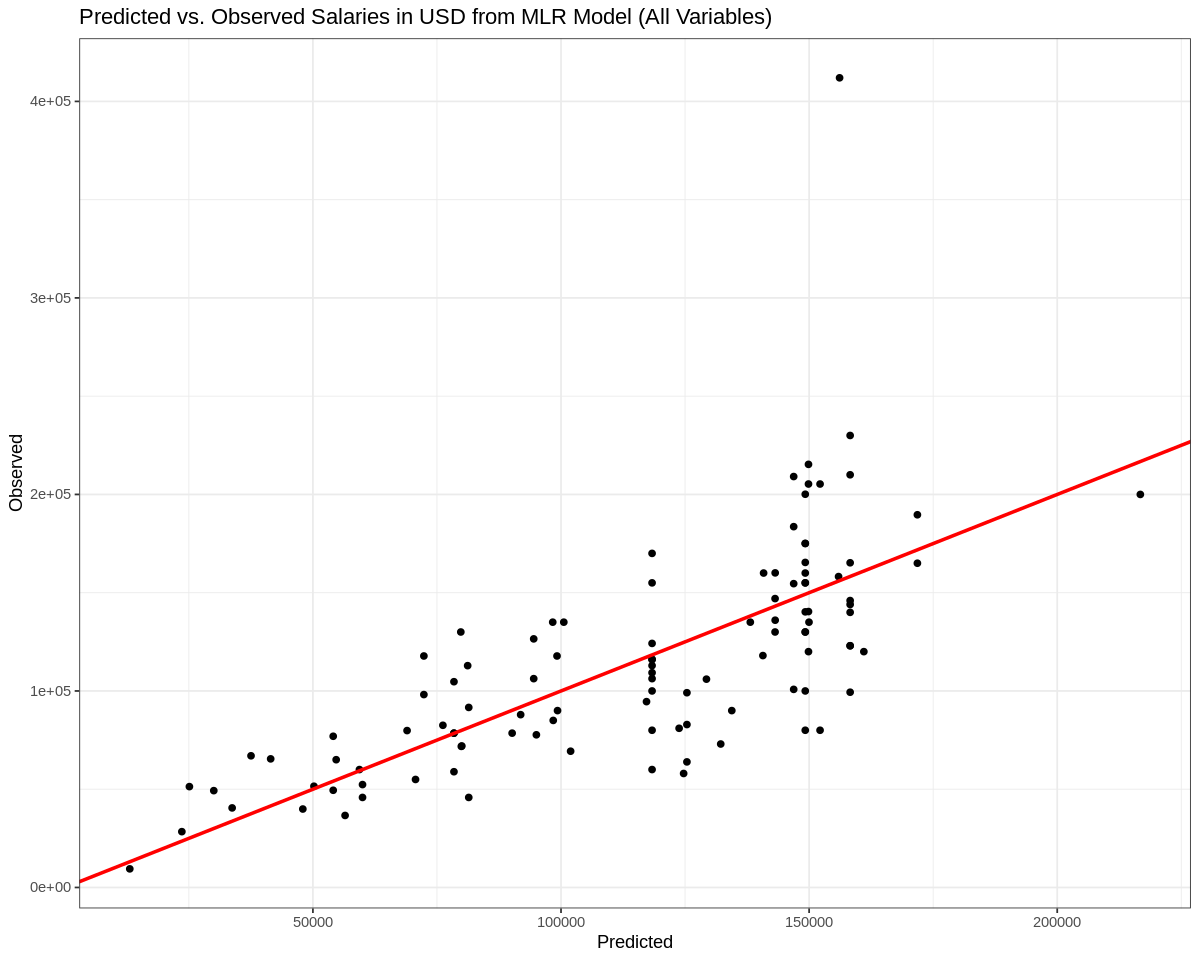

In [32]:
fig1 <- ggplot(linear_prediction1,
               aes(x = Predicted, y = Observed)) +
               geom_point() +
               geom_abline(intercept = 0,
                           slope = 1,
                           color = "red",
                           linewidth = 1)+
               ggtitle("Predicted vs. Observed Salaries in USD from MLR Model (All Variables)") +
               theme_bw()

fig1

Analyzing the results we see that both MLR models give poor prediction and low accuracy, with RMSE values of **39594.15** and **40947.49**, showing that the models are on average predicting salaries that are around 40,000 USD away from test values. This can be further seen by the **adjusted** $R^2$ from either model, showing values of **0.56** and **0.44** which is only slightly better than the intercept-only model. We attribute this largely to the fact that the dataset is primarily categorical variables, with data that may not fit well linear models or current methods of variable selection. Future improvements involve using cross-validation to improve model training as well as look into other methods of variable selection such as Lasso or Ridge.